In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('hotel_reviews.csv')
df.head()

,GuestName,RoomType,VisitDate,GroupType,Hotel Name,Location,Address,Contact,Rating,Comments,Tags
0,Olga,Budget Twin Room,22-Jun,Solo traveler,Royal Murree Lodge,Murree,973 Avenue,(+92) 359-1303889,9,The epitome of hospitality.,"[' Leisure trip ', ' Couple ', ' Duplex Double Room ', ' Stayed 6 nights ']"
1,Iwona,Double Room,22-Dec,Family,Silver Murree Lodge,Murree,891 Road,(+92) 342-8939008,8,Charming and cozy atmosphere.,"[' Leisure trip ', ' Couple ', ' Duplex Double Room ', ' Stayed 4 nights ']"
2,Ruijia,Double Room,22-Dec,Solo traveler,Regal Abbottabad Palace,Abbottabad,405 Avenue,(+92) 389-7648131,7,Remarkable attention to guest comfort.,"[' Leisure trip ', ' Family with young children ', ' Duplex Double Room ', ' Stayed 3 nights ', ' Submitted from a mobile device ']"
3,Theprincem,Double Room with Balcony,22-Sep,Solo traveler,Crystal Rawalpindi Resort,Rawalpindi,850 Street,(+92) 335-3794194,6,An oasis of luxury and comfort.,"[' Leisure trip ', ' Solo traveler ', ' Duplex Double Room ', ' Stayed 3 nights ']"
4,M,Family Suite with Balcony,22-Oct,Family,Royal Rawalpindi Inn,Rawalpindi,952 Avenue,(+92) 315-8494546,7,Excellent service and facilities!,"[' Leisure trip ', ' Couple ', ' Suite ', ' Stayed 2 nights ', ' Submitted from a mobile device ']"


In [ ]:
df.isnull().sum()

GuestName      0
RoomType      63
VisitDate      0
GroupType      0
Hotel Name     0
Location       0
Address        0
Contact        0
Rating         0
Comments       0
Tags           0
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
print(df.shape)
df.drop(columns=['GuestName','RoomType','VisitDate','GroupType'],inplace=True)
df.isnull().sum()

(1460, 11)


Hotel Name    0
Location      0
Address       0
Contact       0
Rating        0
Comments      0
Tags          0
dtype: int64

In [ ]:
avg_ratings = df.groupby('Hotel Name')['Rating'].mean().round(1).sort_values(ascending=False)
avg_ratings

Hotel Name
Crystal Sialkot Inn            10.0
Golden Sialkot Resort          10.0
Sapphire Lahore Motel          10.0
Diamond Faisalabad Palace      10.0
Heritage Gujranwala Retreat    10.0
                               ... 
Royal Sargodha Inn              4.0
Elite Hyderabad Hotel           4.0
Imperial Gilgit Lodge           4.0
Imperial Hyderabad Resort       4.0
Imperial Quetta Motel           4.0
Name: Rating, Length: 1103, dtype: float64

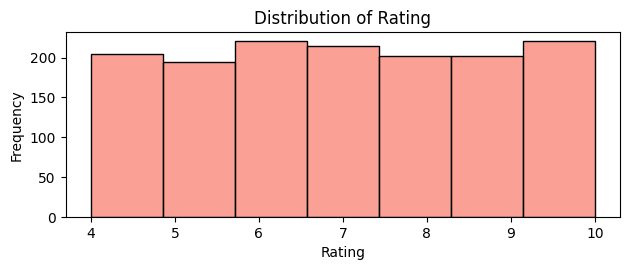

In [ ]:

plt.subplot(2, 1, 2)
sns.histplot(df['Rating'], color='salmon',bins=7)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Frequency')

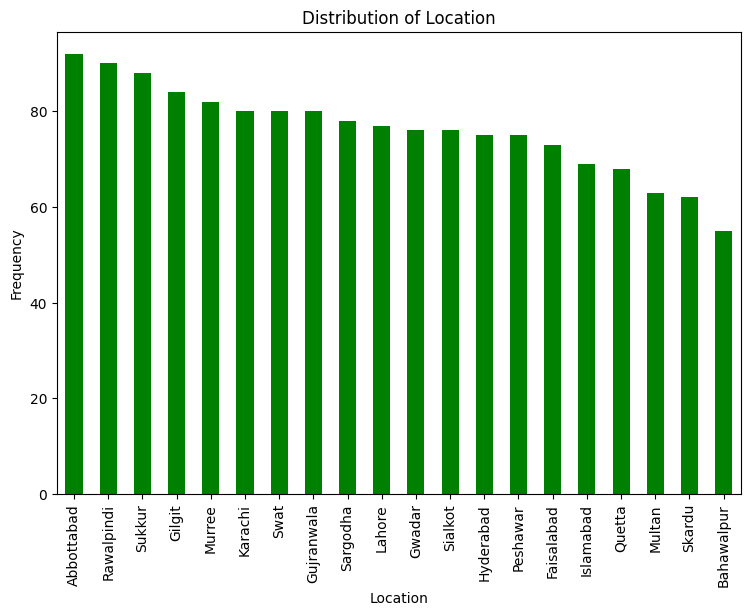

In [ ]:
plt.figure(figsize=(30, 6))

plt.subplot(1, 3, 3)
df['Location'].value_counts().plot(kind='bar', color='green')
plt.title('Distribution of Location')
plt.xlabel('Location')
plt.ylabel('Frequency')

In [ ]:
df

,Hotel Name,Location,Address,Contact,Rating,Comments,Tags
0,Royal Murree Lodge,Murree,973 Avenue,(+92) 359-1303889,9,The epitome of hospitality.,"[' Leisure trip ', ' Couple ', ' Duplex Double Room ', ' Stayed 6 nights ']"
1,Silver Murree Lodge,Murree,891 Road,(+92) 342-8939008,8,Charming and cozy atmosphere.,"[' Leisure trip ', ' Couple ', ' Duplex Double Room ', ' Stayed 4 nights ']"
2,Regal Abbottabad Palace,Abbottabad,405 Avenue,(+92) 389-7648131,7,Remarkable attention to guest comfort.,"[' Leisure trip ', ' Family with young children ', ' Duplex Double Room ', ' Stayed 3 nights ', ' Submitted from a mobile device ']"
3,Crystal Rawalpindi Resort,Rawalpindi,850 Street,(+92) 335-3794194,6,An oasis of luxury and comfort.,"[' Leisure trip ', ' Solo traveler ', ' Duplex Double Room ', ' Stayed 3 nights ']"
4,Royal Rawalpindi Inn,Rawalpindi,952 Avenue,(+92) 315-8494546,7,Excellent service and facilities!,"[' Leisure trip ', ' Couple ', ' Suite ', ' Stayed 2 nights ', ' Submitted from a mobile device ']"
...,...,...,...,...,...,...,...
1455,Grand Gilgit Resort,Gilgit,811 Street,(+92) 380-7956028,4,"Unpleasant stay, wouldn't recommend.","[' Leisure trip ', ' Couple ', ' City King Room ', ' Stayed 3 nights ']"
1456,Diamond Skardu Palace,Skardu,217 Avenue,(+92) 385-1977358,5,Poor service and unclean rooms.,"[' Leisure trip ', ' Solo traveler ', ' Superior King Room with Balcony ', ' Stayed 1 night ']"
1457,Sapphire Faisalabad Motel,Faisalabad,48 Avenue,(+92) 393-7538122,9,Impeccable cleanliness and hygiene standards.,"[' Leisure trip ', ' Couple ', ' City King Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']"
1458,Heritage Sialkot Inn,Sialkot,233 Road,(+92) 320-2585708,6,Absolutely loved our stay here.,"[' Leisure trip ', ' Family with young children ', ' City Twin Room ', ' Stayed 3 nights ', ' Submitted from a mobile device ']"


In [ ]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from ast import literal_eval

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def correction(string):
    string = string[0]
    if type(string) != list:
        return "".join(literal_eval(string))
    else:
        return string

In [ ]:
df['Tags'] = df[["Tags"]].apply(correction, axis=1)


In [ ]:
df['Tags'][0]

' Leisure trip  Couple  Duplex Double Room  Stayed 6 nights '

In [ ]:
df['Tags'] = df['Tags'].str.lower()
df['Location'] = df['Location'].str.lower()

In [ ]:
def recommend_hotel(location, description):
    description = description.lower()
    word_tokenize(description)
    stop_words = stopwords.words('english')
    lemmatizer = WordNetLemmatizer()
    filtered = {word for word in description if word not in stop_words}
    filtered_set = set()
    for fs in filtered:
        filtered_set.add(lemmatizer.lemmatize(fs))

    city = df[df['Location'] == location.lower()]
    city = city.set_index(np.arange(city.shape[0]))
    list1 = []; list2 = []; cos = [];

    for i in range(city.shape[0]):
        temp_token = word_tokenize(city["Tags"][i])
        temp_set = [word for word in temp_token if word not in stop_words]
        temp2_set = set()
        for s in temp_set:
            temp2_set.add(lemmatizer.lemmatize(s))
        vector = temp2_set.intersection(filtered_set)
        cos.append(len(vector))
    city['similarity'] = cos
    city = city.sort_values(by='similarity', ascending=False)
    city.drop_duplicates(subset='Hotel Name', keep='first', inplace=True)
    city.sort_values('Rating', ascending=False, inplace=True)
    city.reset_index(inplace=True)
    return city[["Hotel Name", "Location", "Address","Contact"]].head(5)

In [ ]:
def run():
    country = input("Which city are you going to stay in?\t:")
    description = input("purpose of tour:\t:")
    return recommend_hotel(country, description,)
pd.set_option('display.max_colwidth', None)  # Display full text in DataFrame output
run()

Which city are you going to stay in?	:lahore
purpose of tour:	:Solo travel


,Hotel Name,Location,Address,Contact
0,Majestic Lahore Motel,lahore,849 Road,(+92) 319-4792879
1,Comfort Lahore Resort,lahore,77 Street,(+92) 332-7027848
2,Palace Lahore Resort,lahore,288 Road,(+92) 313-1058410
3,Oasis Lahore Motel,lahore,147 Avenue,(+92) 350-6903848
4,Sapphire Lahore Motel,lahore,262 Avenue,(+92) 360-7101686
